# <h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment #2</h1></center>

<b>Uchenna Chima</b>  
<b>Banner ID: B00949727</b>  


### 1. Task 1 - Research on the dataset.

#### i) Subtask 1.a - Process or pre-process the heart disease data. Show the outputs of the pre-processing phase.

In [276]:
#Reference [Source #1]

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

heart_data = pd.read_csv('heart.csv')

                                                                #Data Cleaning

print('\n\t\t\t*** Data Shape prior to removing duplicates ***\n ', heart_data.shape)

#Removing Duplicates - Dropping potential duplicated records from dataset
heart_data.drop_duplicates()

print('\n\t\t\t*** Data Shape after removing duplicates ***\n', heart_data.shape)

#Checking for missing data in any of the 13 features (Column name, #sum of missing data records (0 = no missing data))
null_data = heart_data.isnull().sum()
print('\n\t\t\t*** Check for missing data ***\n', null_data)
print('\t\t\t*** Result: No Missing Data/Null Data found ***\n')

print('\n\t\t\t*** Data prior to applying any transformations ***\n\n', heart_data)

                                                            #Data Transformation

#Data normalization: Scale numerical data using min-max scaler(normalization) or z-score scaler (standardization)
        #(apply min-max to categorical-like (data which naturally falls within a range), z-score to continuous (blood_pressure e.t.c))

#Did not normalize: (age, sex, fbs, exang, target) as i believe these values need to remain the same for interpretability of the ML algorithm.

#categorical-like data: chest_pain_scaled, rest_eeg_scaled, slope_scaled, ca_scaled, thal_scaled
#continuous data: rest_bps_scaled, cholest_scaled, max_heart_rate_scaled, oldpeak_scaled, 

heart_data_numpy = heart_data.to_numpy()

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#age_scaled = standard_scaler.fit_transform(heart_data_numpy[:,0].reshape(-1,1)) #Patient Age (29-77)
chest_pain_scaled = min_max_scaler.fit_transform(heart_data_numpy[:,2].reshape(-1,1)) #Chest pain type (0-3)
rest_bps_scaled = standard_scaler.fit_transform(heart_data_numpy[:,3].reshape(-1,1)) #resting blood pressure (94 - 200)
cholest_scaled = standard_scaler.fit_transform(heart_data_numpy[:,4].reshape(-1,1)) #serum cholestoral (126 - 564)
rest_eeg_scaled = min_max_scaler.fit_transform(heart_data_numpy[:,6].reshape(-1,1)) #resting electrocardiographic results (0-2)
max_heart_rate_scaled = standard_scaler.fit_transform(heart_data_numpy[:,7].reshape(-1,1)) #maximum heart rate achieved (126 - 564)
oldpeak_scaled = standard_scaler.fit_transform(heart_data_numpy[:,9].reshape(-1,1)) #ST depression induced by exercise relative to rest(0-6.2)
slope_scaled = min_max_scaler.fit_transform(heart_data_numpy[:,10].reshape(-1,1)) #the slope of the peak exercise ST segment (0-2)
ca_scaled = min_max_scaler.fit_transform(heart_data_numpy[:,11].reshape(-1,1)) #number of major vessels (0-4) colored by flourosopy
thal_scaled = min_max_scaler.fit_transform(heart_data_numpy[:,12].reshape(-1,1)) #resting blood pressure (in mm Hg on admission to the hospital)

heart_data_numpy[:,2] = chest_pain_scaled.flatten()
heart_data_numpy[:,3] = rest_bps_scaled.flatten()
heart_data_numpy[:,4] = cholest_scaled.flatten()
heart_data_numpy[:,6] = rest_eeg_scaled.flatten()
heart_data_numpy[:,7] = max_heart_rate_scaled.flatten()
heart_data_numpy[:,9] = oldpeak_scaled.flatten()
heart_data_numpy[:,10] = slope_scaled.flatten()
heart_data_numpy[:,11] = ca_scaled.flatten()
heart_data_numpy[:,12] = thal_scaled.flatten()

heart_data = pd.DataFrame(heart_data_numpy, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thlach', 'exang', 'oldpeak', 
                                                     'slope', 'ca', 'thal', 'target'])

print('\n\t\t\t*** Data After applying transformations ***\n\n', heart_data)

                                                            #Outlier Detection
#Checking for outliers using Z-Score
z_scores = np.abs(stats.zscore(heart_data))
threshold = 2.5

#Mask for outlier detection (True for outliers, False for inliers)
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter out rows with outliers
heart_data_no_outliers = heart_data[~outlier_mask]

print('\n\t\t\t*** Data After removing outliers (using z-score) ***\n\n', heart_data_no_outliers)

                                                    #Split dataset into train,test,validation sets

X = heart_data_no_outliers.drop(columns=['target'])
y = heart_data_no_outliers['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the dataset into a training set and a combined test/validation set
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the combined test/validation set into a test set and a validation set
X_test, X_validation, y_test, y_validation = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)

print('\n\t\t\t*** Train/Test/Validation Split Results (80/10/10) ***')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('X_validation shape:', X_validation.shape)
print('y_validation shape:', y_validation.shape)




			*** Data Shape prior to removing duplicates ***
  (1025, 14)

			*** Data Shape after removing duplicates ***
 (1025, 14)

			*** Check for missing data ***
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
			*** Result: No Missing Data/Null Data found ***


			*** Data prior to applying any transformations ***

       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ... 

**Sub-Subtask 1.a - Code Explanation:**

In order to filter the heart dataset I took a few steps: <br><br> (1) - I first import the heart data into a Pandas DataFrame. <br><br> (2) - To begin the data cleaning step, I first drop all duplicated rows and show the shape of the data prior and post taking this action. <br><br> (3) - Next, I check to see if there are any entries/rows consisting of null values. In this case, there weren't any so I did not have to take any further pre-processing steps to filter null entries. <br><br> (4) - To begin the data transformation step, I convert my Pandas DF into a Numpy array to allow seamless transformation with standardization (StandardScaler()) and normalization (MinMaxScaler()). <br><br> (5) - Next, I transform my data by applying standardization to these features: trestbps, chol, thalach and oldpeak and normalization to these features: cp, restecg, slope, ca, thal. <br><br> (6) - Next, to accomplish the outlier detection step, I use z_score with a threshold of 2.5(Optimized to retain as much data whilst removing as many outliers as possible) and filtered out the corresponding entries which were above the allocated threshold. <br> (6.1) - It is important to note that in this step, I seperated the data into two separate DF's in order to display the differences between the data with/without outliers in the preceeding questions. <br><br> (7) - Lastly, to finish the data preprocessing stage I split my data into train/test/validation sets, using 80% of the data for training, 10% for testing and 10% for validation.

#### ii) Subtask 1.b - Visually analyze the data after processing or pre-processing.

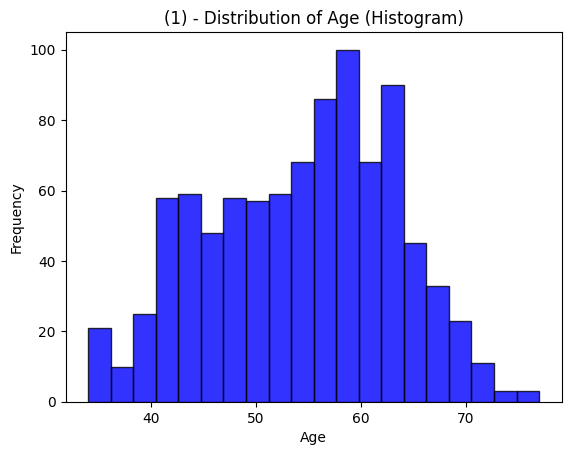

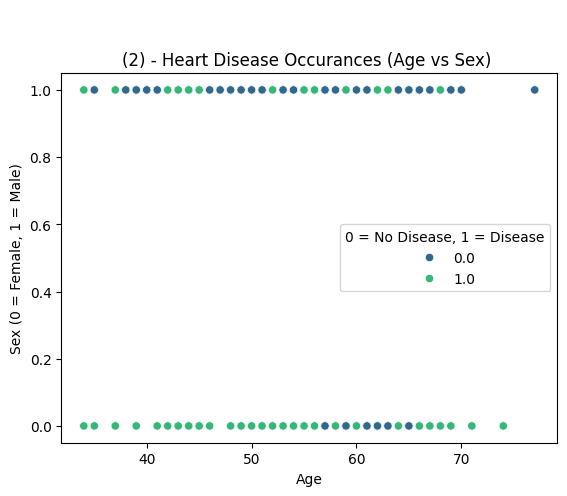

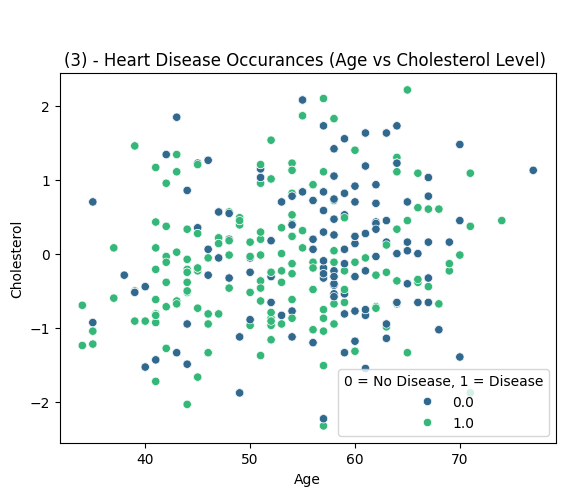

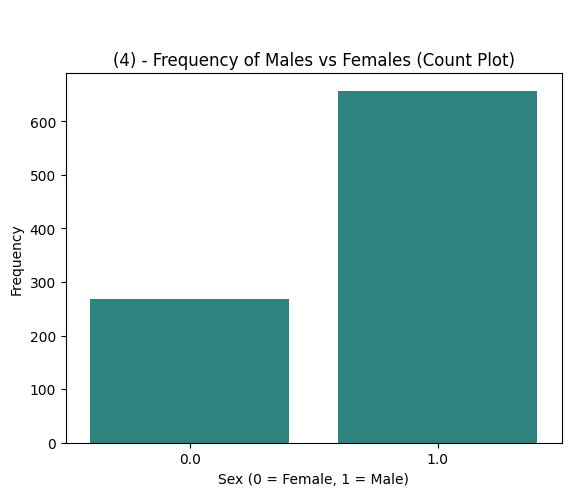

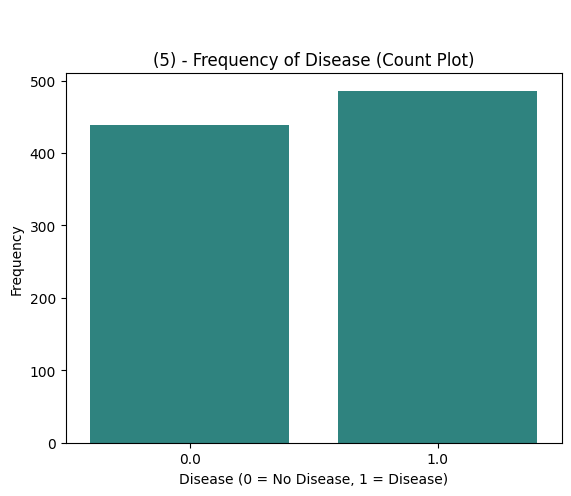

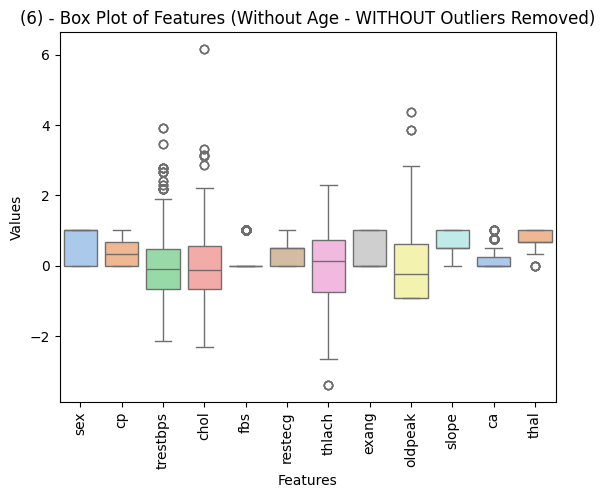

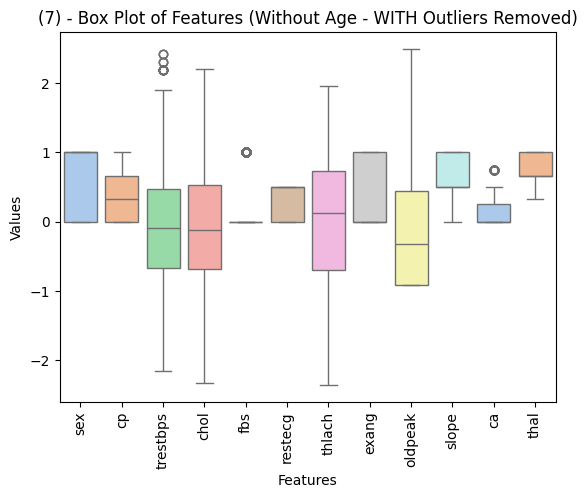

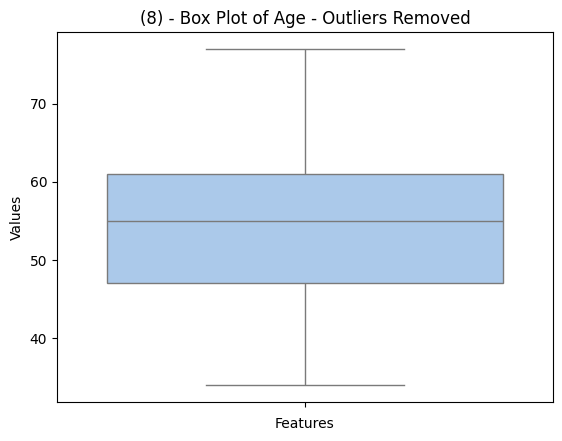

In [277]:
#Reference [Source #1, Source #2]
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

                                                            #Histograms
plt.hist(heart_data_no_outliers['age'], bins=20, color='blue', alpha=0.8, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('(1) - Distribution of Age (Histogram)')

# Show the histogram
plt.show()



                                                        #Scatter Plots
#Scatter Plot #1
sns.scatterplot(x='age', y='sex', hue='target', data=heart_data_no_outliers, palette='viridis')

#Labels
plt.xlabel('Age')
plt.ylabel('Sex (0 = Female, 1 = Male)')
plt.legend(title='0 = No Disease, 1 = Disease')
plt.title('\n\n(2) - Heart Disease Occurances (Age vs Sex) ')

plt.show()

#Scatter Plot #2
sns.scatterplot(x='age', y='chol', hue='target', data=heart_data_no_outliers, palette='viridis')

#Labels
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='0 = No Disease, 1 = Disease')
plt.title('\n\n(3) - Heart Disease Occurances (Age vs Cholesterol Level) ')

plt.show()

                                                     #Count Plots
#Count Plot #1
sns.countplot(x='sex', data=heart_data_no_outliers, palette='viridis', hue = 0, legend=False)

#Labels
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.title('\n\n(4) - Frequency of Males vs Females (Count Plot)')

plt.show()

#Count Plot #2
sns.countplot(x='target', data=heart_data_no_outliers, palette='viridis', hue = 0, legend=False)

#Labels
plt.xlabel('Disease (0 = No Disease, 1 = Disease)')
plt.ylabel('Frequency')
plt.title('\n\n(5) - Frequency of Disease (Count Plot)')

plt.show()

                                                     #Box Plots
#Box Plot #1
sns.boxplot(data=heart_data.drop(columns=['target', 'age']), palette='pastel')
plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('(6) - Box Plot of Features (Without Age - WITHOUT Outliers Removed)')

plt.show()

#Box Plot #2
sns.boxplot(data=heart_data_no_outliers.drop(columns=['target', 'age']), palette='pastel')
plt.xticks(rotation=90) 

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('(7) - Box Plot of Features (Without Age - WITH Outliers Removed)')

plt.show()

#Box Plot #3
sns.boxplot(data=heart_data_no_outliers['age'],  palette='pastel', legend=False)
plt.xticks(rotation=90) 

#labels and a title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('(8) - Box Plot of Age - Outliers Removed')

plt.show()


**Subtask 1.b - Code & Visualization Explanation:**

In order to create the 8 different data visualizations consisting of a variety of: histograms, scatter plots, count plots & box plots, I took the following steps: <br><br> (1) - For plotting the graphs, I utilized the seaborn library which gives access to the different type of data visualization plot as mentioned previously (count plot, box plot e.t.c). Then using matplot lib, I labelled each graph respectively and displayed them. <br><br> (2) - For the histogram visualization (1), I show the normal distribution of the "Age" feature in my dataset. This visualization was included to let me know how the data is distributed in regard to the age ranges and lets me draw further conclusions when performing future analysis. <br><br> (3) - For the first scatter plot visualization (2), I show the relationship of age vs gender with respect to having been classifed as diseased (0 - blue, 1 - green). From this visualization I can see that females have more occurences of heart disease than men. And men in the age range of 40-50 are more likely to have heart disease. <br><br> (4) - For the second scatter plot visualization (3), I show the relationship of age vs cholestrol with respect to having been classifed as diseased (0 - blue, 1 - green). From this visualization I can see that patients (female & male) between the ages of 40-60 are more likely to have heart disease regardless of their cholesterol levels. <br><br> (5) - For the first count plot visualization (4), I show the ratio of male to female occurences in the dataset. From this visualization I can tell that there is a significantly more males than females. <br><br> (6) - For the second count plot visualization (5), I show the ratio of diseased vs non-diseased patients. From this visualization I can tell that the distribution of the labels is not skewed to one of the two classes. <br><br> (7) - For the first box plot visualization (6), I show the box plot for every feature (excluding age) in my dataset without removing outliers. From this visualization I can see that the dataset consists of several outliers especially in the "trestbps" feature. <br><br> (8) - For the second box plot visualization (7), I show the box plot for every feature in my dataset (excluding age) after removing outliers. From this visualization I can see that after removing outliers, the most predictive features for predicting a disease would be a combination of (trestbps, chol, thlach oldpeak).
<br><br>(9) - For the third box plot visualization (8), I show the box plot for age independantly as I did not normalize/standardize this feature. From this visualization I can see that after removing outliers, age will also be a good predictive feature.

#### iii) Subtask 1.c - Explain the method(s) you chose for processing/preprocessing and provide a descriptive analysis to justify your choice. You can use 1.b to justify

**Subtask 1.c - Explanation:**

For pre-processing my data I used a few "stages" to accomplished my desired data state before applying any Machine Learning algorithms to it. My data pre-processing stages consisted of: (1) - Data Cleaning, (2) - Data Transformation, (3) - Outlier Detection &  Removal, (4) - Data Splitting (Creation of Train/Test/Validation sets) 


<br><br> *(1) - Data Cleaning Stage* <br><br> In order to purify the dataset, there were two main steps taken: (1) - Removing Duplicates, (2) - Checking for Null Entries and Removing Null Entries. <br><br> (1) - The reason for removing duplicates is that duplicates can introduce bias data analysis & machine learning model thus leading to overfitting. To accomplish this step, pandas provides a 'drop_duplicates()' method on Pandas data frames. Although, my result shows that the dataset did not contain any duplicates, it is still important to execute and show this step. <br><br> (2) - The reason for checking for null entries and removing null entries is that missing data can lead to biased and/or inaccurate results when doing data analysis and building ML models. Thus, I took this step to handle the integrity of my data. Although, my result shows that the dataset did not contain any null entries, it is still important to execute and show this step. To accomplish this step, pandas provides a 'drop_duplicates()' method on Pandas data frames. To accomplish this step, pandas provides a 'is_null()' method on Pandas data frames which checks for null entries.





<br><br> *(2) - Data Transformation* <br><br> In order to transform (standardize/normalize) the dataset, I applied two different scaling techniques: (1) - Standardization using SKLearn 'StandardScaler()', (2) - Normalization using SKLearn 'MinMaxScaler()'. <br><br> (1) - The purpose of using Standardization was to scale certain features to have a mean of 0 fluctuate between a standard deviation of 2. The reason that I chose to use this scaling method was because some of my features were continuous in nature and didn't naturally fall between a certain range. These features were: trestbps, chol, thalach and oldpeak. The result of applying standardization is seen in output/markdown block shown in the "*Data After applying transformations*" print statement. <br><br> (2) - The purpose of using Normalization was to scale certain features to have a range of 0-1. The reason that I chose to use this scaling method was because some of my features were continuous in nature in addition to falling between a certain range as was described in the dataset description at https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data. These features were: cp, restecg, slope, ca and thal. The result of applying standardization is seen in output/markdown block shown in the "*Data After applying transformations*" print statement.


<br><br> *(3) - Outlier Detection & Removal Stage* <br><br> In order to remove outliers from my datastep I used the Z-Score based outlier detection approach with a threshold of 2.5. Going below this threshold lead to fewer outliers present in the dataset but came at a cost of a reduced overall dataset size which I interpreted as being negative in terms of training and testing the Machine Learning Models in addition to making Predictions for Health Related data. Going above 2.5 led to many outliers as seen in the box plot (figure #6). Thus, I settled for 2.5 as it removed the majority of outliers but also retained a decent amount of data for my Machine Learning model to work with. The result of removing outliers came at a cost of removing 100 entries from my inital dataset. Z-Score is a statistical measure that shows how far away a data point is from the mean in terms of standard deviations thus to keep things standard and not very complicated, I chose this approach for outlier removal.



<br><br> *(4) - Data Splitting (Creation of Train/Test/Validation sets) Stage* <br><br> The final pre-processing steps involved splitting the data into train/test/validation sets in order to apply and evaluate machine learning models. For my datasplitting I chose to do a 80/10/10 split. This means I used 80% of the data for training, 10% of the data for testing and the remaining 10% of the data for validation. The resulting shapes of the respective datasets (train/test/validation) is seen in output/markdown block shown in the "*Train/Test/Validation Split Results (80/10/10)*" print statement.

### 2. Task 2 

#### i) Subtask 2.a - Apply Naive Bayes classifier on your dataset.

In [278]:
#Reference [Source #1]

from sklearn.naive_bayes import GaussianNB


naive_bayes_clf = GaussianNB()

#Training naive_bayes Classfier
naive_bayes_clf.fit(X_train, y_train)

#Predictions using naive_bayes Classifier
y_pred = naive_bayes_clf.predict(X_test)


**Sub-Subtask 2.a - Code Explanation:**

In order to apply a Naive Bayes classifier on the dataset I took a few steps: <br><br> (1) - I imported the naive_bayes module from SKLearn which gives access to the GaussianNB (Naive Bayes Classifier). <br><br> (2) - Next, I created a GaussianNB object and trained it using X_train and y_train from the train/test/validation split from earlier. <br><br> (3) - Lastly, I generated predicted values (y_pred) using X_test from the train/test/validation split from earlier in order to make evaluations in preeceding steps.

#### i) Subtask 2.b - Evaluate the performance for disease classification.

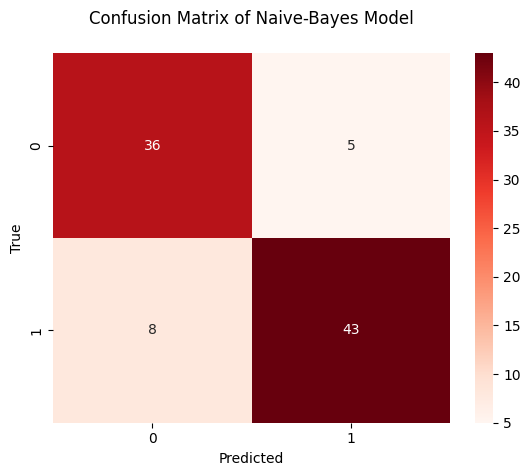



			*** Evaluation Metrics of Naive Bayes Model ***

Accuracy:  0.8586956521739131
Precision:  0.8431372549019608
Recall:  0.8958333333333334
F-measure:  0.8686868686868686
Specificity:  0.8780487804878049


In [279]:
#Reference [Source #1]
from sklearn import metrics
import seaborn as sns

#Confusion matrix, accuracy, precision, recall, specificity and f-measure

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

acc = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test)
recall = metrics.recall_score(y_pred, y_test)
f_score = metrics.f1_score(y_pred, y_test)

tn = confusion_matrix[0][0]
fp = confusion_matrix[0][1]
specificity = tn/(tn+fp)

#Top left = True Negatives, Top Right = False Positives, Bottom left = False Negatives, Bottom Right = True Positives
sns.heatmap(confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Naive-Bayes Model\n")
plt.show()

print('\n\n\t\t\t*** Evaluation Metrics of Naive Bayes Model ***\n')
print('Accuracy: ', acc)
print('Precision: ', precision)
print('Recall: ', recall)
print('F-measure: ', f_score)
print('Specificity: ', specificity)

**Sub-Subtask 2.b - Code Explanation & Evaluation:**

In order to evaluate the performance of the Naive Bayes classifier on the Heart Dataset I used a confusion matrix to display the true/false positive/negative predictions in addition to the following model evaluation metrics: Accuracy, Precision, Recall, F_Score and Specificity. <br><br>*Code Explanation* <br><br> (1) - To create the Confusion Matrix, I used SKLearns' 'confusion_matrix' which gives access to a confusion matrix object and used it to display the interpretation of y_test vs y_pred. <br> (2) - Next, I calculated the classifiers Accuracy, Precision, Recall and F_Score using SKLearns' metrics module which gives access to the respective methods for computation on y_test vs y_pred. <br> <br><br>*Confusion matrix evaluation: (1) - Top left = True Negatives, (2) - Top Right = False Positives, (3) - Bottom left = False Negatives, (4) - Bottom Right = True Positives.* <br><br> (1) - The model was very accurate in predicting true negatives (36/44) which means that it does well in recognizing patients who do not have a disease. <br> (2) - The model was very accurate in predicting false positives (5/48) which means that it does well with differentiating patients who truly have a disease. <br> (3) - The model was very accurate in predicting false negatives (8/44) which means that it does well with differentiating patients who truly do not have a disease. <br> (4) - The model was very accurate in predicting true positives (43/48) which means that it does well in recognizing patients who truly have a disease.<br><br>*Evaluation Metrics Takeaways*<br><br>My model returned a 84% or higher all metrics (accuracy, precision, recall, f_score, specificity) which suggests that my model did well with predictions on the test set. For a light-weight classifier like Naive Bayes, this was pretty good. Though, for a much larger dataset, this classifier may not be as good.

### 3. Task 3 

#### i) Subtask 3.a - Repeat task [2] by applying logistic regression with gradient descent.

In [280]:
class CustomLogisticRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add a bias term (intercept) to the feature matrix X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Initialize model parameters (coefficients)
        self.theta = np.random.randn(X_b.shape[1])

        m = X_b.shape[0]

        for iteration in range(self.num_iterations):
            # Compute predictions
            z = np.dot(X_b, self.theta)
            y_pred = self.sigmoid(z)

            # Calculate the gradient of the cost function
            gradient = np.dot(X_b.T, (y_pred - y)) / m

            # Update model parameters using gradient descent
            self.theta -= self.learning_rate * gradient
        
    def predict(self, X):
        # Add a bias term (intercept) to the feature matrix X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute predictions
        z = np.dot(X_b, self.theta)
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)


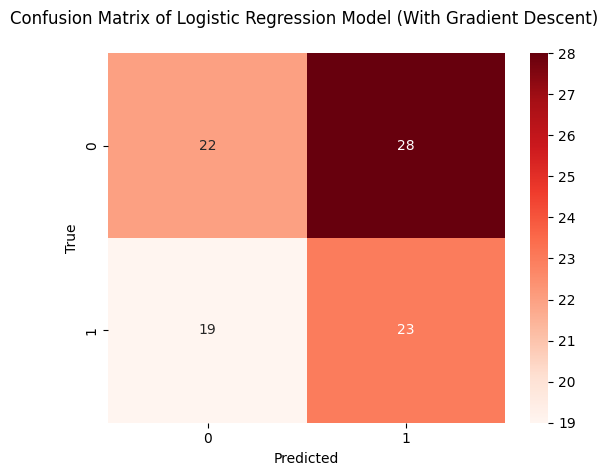



			*** Evaluation Metrics of Logistic Regression Model ***

Accuracy:  0.4891304347826087
Precision:  0.45098039215686275
Recall:  0.5476190476190477
F-measure:  0.49462365591397855
Specificity:  0.8780487804878049


In [281]:
#Reference [Source #3, Source #1]

#Create LR classifier, Train on data, Obtain Predicted results
logistic_regression_clf = CustomLogisticRegression(learning_rate=0.001, num_iterations=20)
logistic_regression_clf.fit(X_train, y_train)

lr_ypred = logistic_regression_clf.predict(X_test)

lr_confusion_matrix = metrics.confusion_matrix(lr_ypred, y_test)

lr_acc = metrics.accuracy_score(lr_ypred, y_test)
lr_precision = metrics.precision_score(lr_ypred, y_test)
lr_recall = metrics.recall_score(lr_ypred, y_test)
lr_f_score = metrics.f1_score(lr_ypred, y_test)

lr_tn = lr_confusion_matrix[0][0]
lr_fp = lr_confusion_matrix[0][1]
lr_specificity = tn/(tn+fp)

#Top left = True Negatives, Top Right = False Positives, Bottom left = False Negatives, Bottom Right = True Positives
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression Model (With Gradient Descent) \n")
plt.show()

print('\n\n\t\t\t*** Evaluation Metrics of Logistic Regression Model ***\n')
print('Accuracy: ', lr_acc)
print('Precision: ', lr_precision)
print('Recall: ', lr_recall)
print('F-measure: ', lr_f_score)
print('Specificity: ', lr_specificity)


**Sub-Subtask 3.a - Code Explanation:**

In order to apply Logistic Regression with Gradient Descent, I had to do it manually as could not find a suitable library for implementing it. In order to do this I took the following steps: <br><br> (1) - Create a CustomLogisticRegression class (*class description below*) that serves as a Logistic Regression Classifier with Gradient Descent. <br> (2) - Train the CustomLogisticRegression class using the Heart Data using the custom 'fit()' method and compute y_pred using the custom 'predict()' method. <br> (3) - Create a heatmap using seaborn and matplot lib in order to show the Confusion Matrix.<br> (4) - Lastly, compute evaluation metrics (Accuracy, Precision, Recall, F-Measure and Specificity, Confusion Matrix) in order to evaluate how the model performed. <br><br> *(1) - CustomLogisticRegression Class Description* <br>This class contains three functions: (1) - sigmoid(), (2) - fit(), (3) - predict()<br><br> (1) - The sigmoid() method is used to scale probability values between 0 and 1 and takes a numpy array as an input. <br><br> (2) - The fit() method trains the Model on the provided data (X_train, y_train) using gradient descent by: <br>(2.1) - Adding a bias term (intercept) to the feature matrix X (X_train). <br>(2.2) - Initializing model's parameters with random values. <br>(2.3) - Performing gradient descent optimization over the specified number of iterations (20) in this case. <br>(2.4) - Computing predictions using the model's parameters. <br>(2.5) - Calculating the gradient of the cost function with respect to the model parameters and Finally updating the model's parameters using the gradient and learning rate.<br><br> (3) - The predict() method handles predicting class labels of 0 or 1 given the feature matrix X (X_test). It does this by: <br>(3.1) - Adding a bias term (intercept) to the feature matrix X (X_train). <br>(3.2) - Computing predictions on y_pred using the learned model parameters. <br>(3.3) - Applying a threshold of 0.5 to the predicted probabilities to classify instances into binary classes (0 or 1). <br>(3.4) - Finally returns a numpy array containing the predicted class labels.

<br> Note: The evaluation metrics of this classifier is explained in subtask 3.b - Did not explain here to limit repetition.

#### ii) Subtask 3.b - Compare the performance of task 3[a] with batch gradient descent, minibatch gradient descent, and stochastic gradient descent.

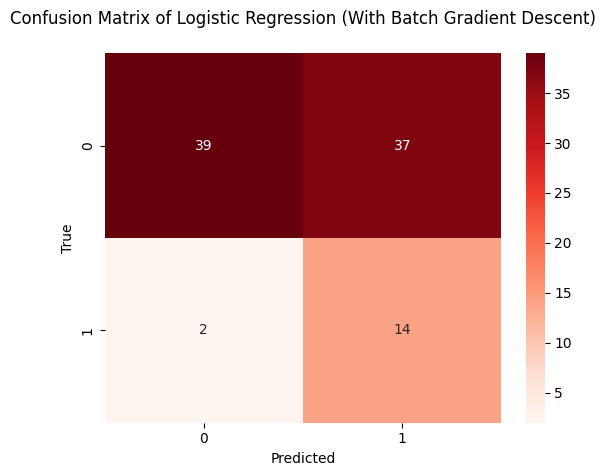



			*** Evaluation Metrics of Logistic Regression With Batch Gradient Descent***

Accuracy:  0.5760869565217391
Precision:  0.27450980392156865
Recall:  0.875
F-measure:  0.4179104477611941
Specificity:  0.5131578947368421


In [282]:
#Reference [Source #3, Source #1]
from sklearn.linear_model import SGDClassifier

# Create an instance of SGDClassifier for logistic regression with batch gradient descent
SGD_batch_classifier = SGDClassifier(max_iter=1, learning_rate='constant', eta0=0.01, loss = 'log_loss')

SGD_batch_classifier.fit(X_train, y_train)

SGD_batch_y_pred = SGD_batch_classifier.predict(X_test)

SGD_batch_confusion_matrix = metrics.confusion_matrix(SGD_batch_y_pred, y_test)

SGD_batch_acc = metrics.accuracy_score(SGD_batch_y_pred, y_test)
SGD_batch_precision = metrics.precision_score(SGD_batch_y_pred, y_test)
SGD_batch_recall = metrics.recall_score(SGD_batch_y_pred, y_test)
SGD_batch_f_score = metrics.f1_score(SGD_batch_y_pred, y_test)

SGD_batch_tn = SGD_batch_confusion_matrix[0][0]
SGD_batch_fp = SGD_batch_confusion_matrix[0][1]
SGD_batch_specificity = SGD_batch_tn/(SGD_batch_tn+SGD_batch_fp)

#Top left = True Negatives, Top Right = False Positives, Bottom left = False Negatives, Bottom Right = True Positives
sns.heatmap(SGD_batch_confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression (With Batch Gradient Descent)\n")
plt.show()

print('\n\n\t\t\t*** Evaluation Metrics of Logistic Regression With Batch Gradient Descent***\n')
print('Accuracy: ', SGD_batch_acc)
print('Precision: ', SGD_batch_precision)
print('Recall: ', SGD_batch_recall)
print('F-measure: ', SGD_batch_f_score)
print('Specificity: ', SGD_batch_specificity)

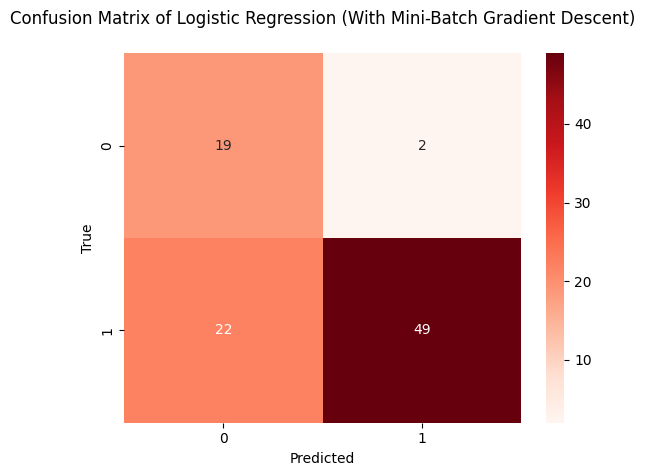



			*** Evaluation Metrics of Logistic Regression With Mini-Batch Gradient Descent***

Accuracy:  0.7391304347826086
Precision:  0.9607843137254902
Recall:  0.6901408450704225
F-measure:  0.8032786885245901
Specificity:  0.9047619047619048


In [283]:
#Reference [Source #3, Source #1]

# Define hyperparameters
batch_size = 64

# Create an instance of SGDClassifier for logistic regression 
SGD_mini_classifier = SGDClassifier(max_iter=1, learning_rate='constant', eta0=0.01, loss = 'log_loss')

# Training loop with mini-batch gradient descent
for _ in range(15):
    
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        SGD_mini_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        

SGD_mini_y_pred = SGD_mini_classifier.predict(X_test)

SGD_mini_confusion_matrix = metrics.confusion_matrix(SGD_mini_y_pred, y_test)

SGD_mini_acc = metrics.accuracy_score(SGD_mini_y_pred, y_test)
SGD_mini_precision = metrics.precision_score(SGD_mini_y_pred, y_test)
SGD_mini_recall = metrics.recall_score(SGD_mini_y_pred, y_test)
SGD_mini_f_score = metrics.f1_score(SGD_mini_y_pred, y_test)

SGD_mini_tn = SGD_mini_confusion_matrix[0][0]
SGD_mini_fp = SGD_mini_confusion_matrix[0][1]
SGD_mini_specificity = SGD_mini_tn/(SGD_mini_tn+SGD_mini_fp)

#Top left = True Negatives, Top Right = False Positives, Bottom left = False Negatives, Bottom Right = True Positives
sns.heatmap(SGD_mini_confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression (With Mini-Batch Gradient Descent)\n")
plt.show()

print('\n\n\t\t\t*** Evaluation Metrics of Logistic Regression With Mini-Batch Gradient Descent***\n')
print('Accuracy: ', SGD_mini_acc)
print('Precision: ', SGD_mini_precision)
print('Recall: ', SGD_mini_recall)
print('F-measure: ', SGD_mini_f_score)
print('Specificity: ', SGD_mini_specificity)

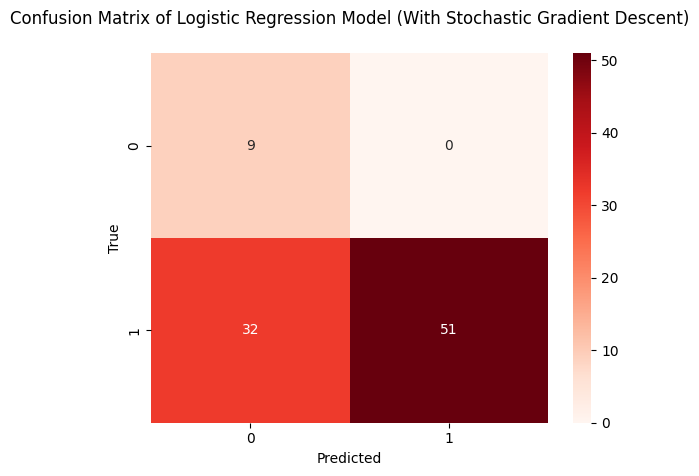



			*** Evaluation Metrics of Stochastic Gradient Descent ***

Accuracy:  0.6521739130434783
Precision:  1.0
Recall:  0.6144578313253012
F-measure:  0.7611940298507462
Specificity:  1.0


In [284]:
#Reference [Source #3, Source #1]

#Create LR classifier, Train on data, Obtain Predicted results
SGD_Stc_Classifier= SGDClassifier(max_iter=1, learning_rate='constant', eta0=0.01, loss = 'log_loss')

#SGD_Stc_Classifier.fit(X_train, y_train)

for _ in range(15):
    for i in range(len(X_train)):
        random_index = np.random.randint(len(X_train))
        X_batch = X_train[random_index:random_index + 1]
        y_batch = y_train[random_index:random_index + 1]
        SGD_Stc_Classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        
SGD_Stc_y_pred = SGD_Stc_Classifier.predict(X_test)

SGD_Stc_confusion_matrix = metrics.confusion_matrix(SGD_Stc_y_pred, y_test)

SGD_Stc_acc = metrics.accuracy_score(SGD_Stc_y_pred, y_test)
SGD_Stc_precision = metrics.precision_score(SGD_Stc_y_pred, y_test)
SGD_Stc_recall = metrics.recall_score(SGD_Stc_y_pred, y_test)
SGD_Stc_f_score = metrics.f1_score(SGD_Stc_y_pred, y_test)

SGD_Stc_tn = SGD_Stc_confusion_matrix[0][0]
SGD_Stc_fp = SGD_Stc_confusion_matrix[0][1]
SGD_Stc_specificity = SGD_Stc_tn/(SGD_Stc_tn+SGD_Stc_fp)

#Top left = True Negatives, Top Right = False Positives, Bottom left = False Negatives, Bottom Right = True Positives
sns.heatmap(SGD_Stc_confusion_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression Model (With Stochastic Gradient Descent)\n")
plt.show()

print('\n\n\t\t\t*** Evaluation Metrics of Stochastic Gradient Descent ***\n')
print('Accuracy: ', SGD_Stc_acc)
print('Precision: ', SGD_Stc_precision)
print('Recall: ', SGD_Stc_recall)
print('F-measure: ', SGD_Stc_f_score)
print('Specificity: ', SGD_Stc_specificity)


In [289]:
print('''**** Logistic Regression (Gradient Descent) VS Logistic Regression (Batch Gradient Descent) 
     VS Logistic Regression (Mini-Batch Gradient Descent) VS Logistic Regression (Stochastic Gradient Descent )
     Comparison ****\n''')

print('\n\t\t\t\t**Accuracy Scores**\n')
print('Logistic Regression (Gradient Descent) Accuracy:', lr_acc)
print('Logistic Regression (Batch Gradient Descent) Accuracy:', SGD_batch_acc)
print('Logistic Regression (Mini-Batch Gradient Descent) Accuracy:', SGD_mini_acc)
print('Logistic Regression (Stochastic Gradient Descent) Accuracy:', SGD_Stc_acc)


print('\n\t\t\t\t**Precision Scores**\n')
print('Logistic Regression (Gradient Descent) Precision:', lr_precision)
print('Logistic Regression (Batch Gradient Descent) Precision:', SGD_batch_precision)
print('Logistic Regression (Mini-Batch Gradient Descent) Precision:', SGD_mini_precision)
print('Logistic Regression (Stochastic Gradient Descent) Precision:', SGD_Stc_precision)

print('\n\t\t\t\t**Recall Scores**\n')
print('Logistic Regression (Gradient Descent) Recall:', lr_recall)
print('Logistic Regression (Batch Gradient Descent) Recall:', SGD_batch_recall)
print('Logistic Regression (Mini-Batch Gradient Descent) Recall:', SGD_mini_recall)
print('Logistic Regression (Stochastic Gradient Descent) Recall:', SGD_Stc_recall)


print('\n\t\t\t\t**F_Scores**\n')
print('Logistic Regression (Gradient Descent) F_Score:', lr_f_score)
print('Logistic Regression (Batch Gradient Descent) F_Score:', SGD_batch_f_score)
print('Logistic Regression (Mini-Batch Gradient Descent) F_Score:', SGD_mini_f_score)
print('Logistic Regression (Stochastic Gradient Descent) F_Score:', SGD_Stc_f_score)

print('\n\t\t\t\t**Specificity Scores**\n')
print('Logistic Regression (Gradient Descent) Specificity:', lr_specificity)
print('Logistic Regression (Batch Gradient Descent) Specificity:', SGD_batch_specificity)
print('Logistic Regression (Mini-Batch Gradient Descent) Specificity:', SGD_mini_specificity)
print('Logistic Regression (Stochastic Gradient Descent) Specificity:', SGD_Stc_specificity)

**** Logistic Regression (Gradient Descent) VS Logistic Regression (Batch Gradient Descent) 
     VS Logistic Regression (Mini-Batch Gradient Descent) VS Logistic Regression (Stochastic Gradient Descent )
     Comparison ****


				**Accuracy Scores**

Logistic Regression (Gradient Descent) Accuracy: 0.4891304347826087
Logistic Regression (Batch Gradient Descent) Accuracy: 0.5760869565217391
Logistic Regression (Mini-Batch Gradient Descent) Accuracy: 0.7391304347826086
Logistic Regression (Stochastic Gradient Descent) Accuracy: 0.6521739130434783

				**Precision Scores**

Logistic Regression (Gradient Descent) Precision: 0.45098039215686275
Logistic Regression (Batch Gradient Descent) Precision: 0.27450980392156865
Logistic Regression (Mini-Batch Gradient Descent) Precision: 0.9607843137254902
Logistic Regression (Stochastic Gradient Descent) Precision: 1.0

				**Recall Scores**

Logistic Regression (Gradient Descent) Recall: 0.5476190476190477
Logistic Regression (Batch Gradient Des

**Sub-Subtask 3.b - Model Evaluations:**

*Logistic Regression (Gradient Descent):*
<br><br>This Model achieved the lowest accuracy which indicates that it struggled to correctly classify the data.
The precision is relatively low which suggests that the model has a high rate of false positives. 
The recall is moderate which suggests that the model can identify some positive instances but misses a significant number of them.
The F-score balances precision and recall. Here, it indicates that the model's overall performance is suboptimal.
The Specificity is relatively high indicating a low rate of false alarms.


<br><br>
*Logistic Regression (Batch Gradient Descent) :*
<br><br>Batch gradient descent achieved a higher accuracy compared to the previous variant, indicating improved classification performance.
The precision is quite low, which means there are many false positives. This suggests that the model might be overly aggressive in classifying instances as positive.
The recall is high, indicating that the model can effectively identify positive instances, but it might have some false negatives.
The F-score is relatively low, suggesting that the model's precision and recall are imbalanced, resulting in suboptimal overall performance.
The specificity score is moderate which indicates that the model has a moderate ability to correctly classify negative instances.


<br><br>
*Logistic Regression (Mini-Batch Gradient Descent):*
<br><br>Mini-batch gradient descent achieved the highest accuracy among the methods, indicating strong classification performance.
The precision is very high, indicating that the model has a low rate of false positives.
The recall is moderate, suggesting that the model can identify a good portion of positive instances but may miss some.
The F-score is relatively high, indicating a good balance between precision and recall and strong overall performance.
Mini-batch gradient descent achieved a relatively high specificity, indicating its ability to correctly classify negative instances.

<br><br>
*Logistic Regression (Stochastic Gradient Descent) :*
<br><br>Stochastic gradient descent achieved a relatively high accuracy, indicating strong classification performance.
The precision is exceptionally high, indicating that the model has a very low rate of false positives.
The recall is moderate, suggesting that the model can identify some positive instances but may miss some.
The F-score is relatively high, indicating a good balance between precision and recall and strong overall performance.
Stochastic gradient descent achieved a perfect specificity score, meaning that it correctly identified all negative instances without any false alarms.

#### iii) Subtask 3.c - Display training, validation, and test loss over 30 epochs.

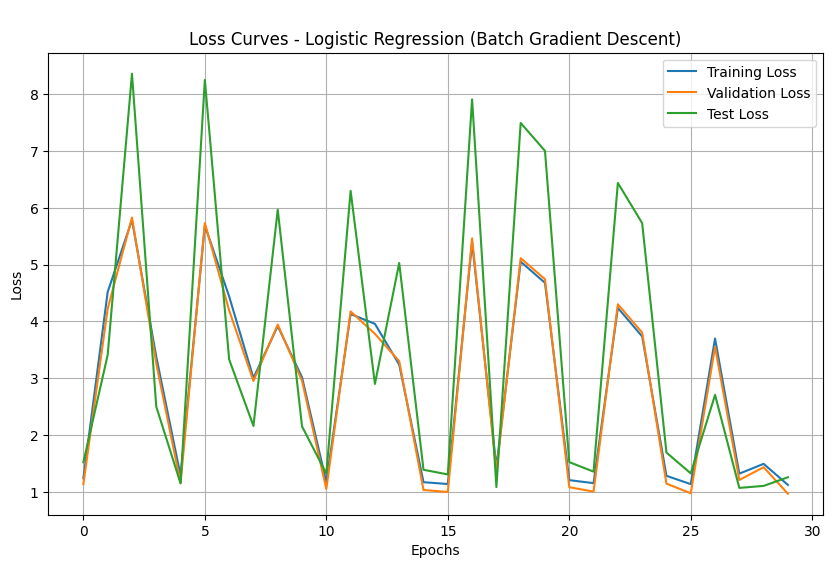

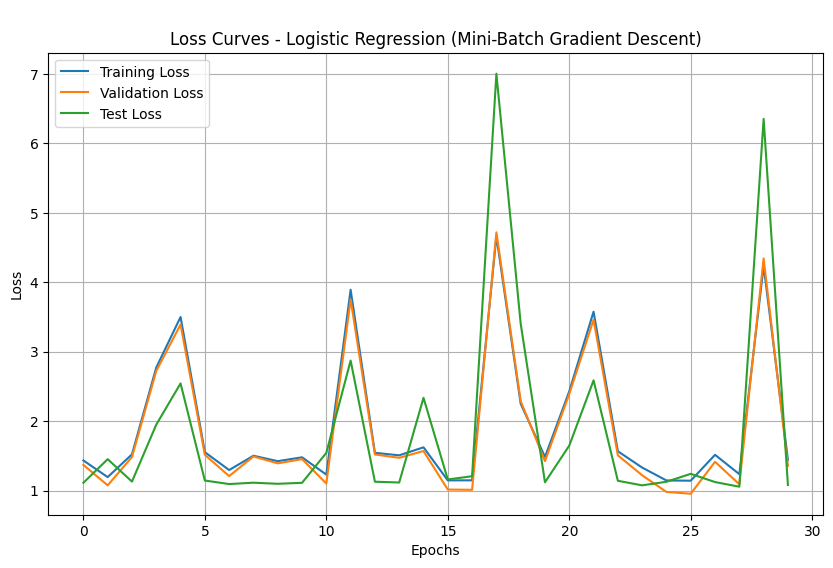

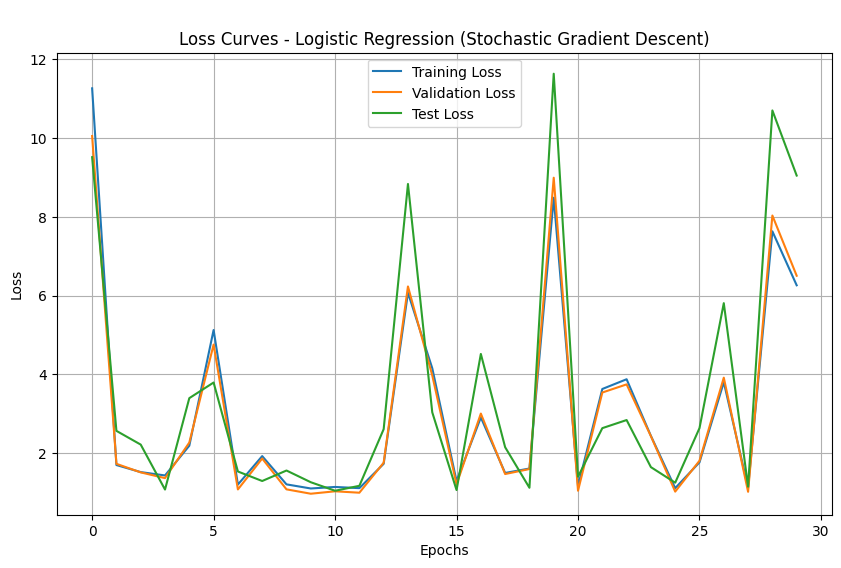

In [292]:
#Reference [Source #1]
from sklearn.metrics import log_loss

# Hyperparameters
max_epochs = 30
learning_rate = 0.01
batch_size = 32

# Logistic Regression Batch Gradient Descent Loss over 30 epochs

# Lists to store training, validation, and test loss
train_loss_history = []
validation_loss_history = []
test_loss_history = []

# Training loop with batch gradient descent

for epoch in range(max_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        SGD_batch_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

    # Calculate and store training loss
    train_loss = log_loss(y_train, SGD_batch_classifier.predict_proba(X_train))
    train_loss_history.append(train_loss)

    # Calculate and store validation loss
    validation_loss = log_loss(y_validation, SGD_batch_classifier.predict_proba(X_validation))
    validation_loss_history.append(validation_loss)

    # Calculate and store test loss
    test_loss = log_loss(y_test, SGD_batch_classifier.predict_proba(X_test))
    test_loss_history.append(test_loss)


# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), train_loss_history, label='Training Loss')
plt.plot(range(max_epochs), validation_loss_history, label='Validation Loss')
plt.plot(range(max_epochs), test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nLoss Curves - Logistic Regression (Batch Gradient Descent)')
plt.grid(True)
plt.show()


# Logistic Regression Mini-Batch Gradient Descent Loss over 30 epochs

# Lists to store training, validation, and test loss
train_loss_history = []
validation_loss_history = []
test_loss_history = []


# Training loop with mini-batch gradient descent
for epoch in range(max_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        SGD_mini_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

    # Calculate and store training loss
    train_loss = log_loss(y_train, SGD_mini_classifier.predict_proba(X_train))
    train_loss_history.append(train_loss)

    # Calculate and store validation loss
    validation_loss = log_loss(y_validation, SGD_mini_classifier.predict_proba(X_validation))
    validation_loss_history.append(validation_loss)

    # Calculate and store test loss
    test_loss = log_loss(y_test, SGD_mini_classifier.predict_proba(X_test))
    test_loss_history.append(test_loss)

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), train_loss_history, label='Training Loss')
plt.plot(range(max_epochs), validation_loss_history, label='Validation Loss')
plt.plot(range(max_epochs), test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nLoss Curves - Logistic Regression (Mini-Batch Gradient Descent)')
plt.grid(True)
plt.show()



# Logisitc Regression Stochastic Gradient Descent Loss over 30 epochs

# Lists to store training, validation, and test loss
train_loss_history = []
validation_loss_history = []
test_loss_history = []

# Training loop with stochastic gradient descent (SGD)
for epoch in range(max_epochs):
    for i in range(len(X_train)):
        random_index = np.random.randint(len(X_train))
        X_batch = X_train[random_index:random_index + 1]
        y_batch = y_train[random_index:random_index + 1]
        SGD_Stc_Classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

    # Calculate and store training loss
    train_loss = log_loss(y_train, SGD_Stc_Classifier.predict_proba(X_train))
    train_loss_history.append(train_loss)

    # Calculate and store validation loss
    validation_loss = log_loss(y_validation, SGD_Stc_Classifier.predict_proba(X_validation))
    validation_loss_history.append(validation_loss)

    # Calculate and store test loss
    test_loss = log_loss(y_test, SGD_Stc_Classifier.predict_proba(X_test))
    test_loss_history.append(test_loss)


# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), train_loss_history, label='Training Loss')
plt.plot(range(max_epochs), validation_loss_history, label='Validation Loss')
plt.plot(range(max_epochs), test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nLoss Curves - Logistic Regression (Stochastic Gradient Descent)')
plt.grid(True)
plt.show()

### 4. Task 4 - Compare the two models in task [2] and [3], and provide a detailed analysis

#### i) Sub-Subtask 4.a - Which evaluation metric did you use? Explain your reasoning.

*Evaluation Metrics used:*
<br><br>For the Naive Bayes classifier and Logistic Regression (Plus Variants of Gradient Descent) I used all of the same evaluation metrics. The evaluation metrics which I used were: Accuracy, Precision, Recall, F1_Score and Specificity
<br><br>
*Reasonings for Accuracy Metric:*
<br><br>Accuracy is a machine learning model evaluation metric that is universal to all classification models. The accuracy metric measures the ratio of correctly predicted instances to the total instances in the dataset. The main reason for using this metric was to provide an overall measure of how each type of Machine Learning Model performed on the given dataset


<br><br>
*Reasonings for Precision Metric:*
<br><br>Precision is a machine learning model evaluation metric that is also universal to all classification models. The precision metric measures the ratio of correctly predicted positive instances to the total predicted positive instances in the dataset. The main reason for using this metric was to see how well each model performed on predicting the true positives (instances where the patient was diagnosed with a disease)


<br><br>
*Reasonings for Recll Metric:*


<br><br>Recall is a machine learning model evaluation metric that is also universal to all classification models. The recall metric measures the ratio of correctly predicted positive instances to the total actual positive instances in the dataset. The main reason for using this metric was to see how well each model performed at predicting positive instances in general. 


<br><br>F1-Score is a machine learning model evaluation metric that is universal to all classification models. The F1-Score metric is a harmonic mean between precision and recall. The main reason for using this metric was to provide a “balanced metric” for evaluating all models against the given dataset.


*Reasonings for Specificity Metric:*
<br><br>Specificity is a machine learning model evaluation metric that is universal to all classification models. The specificity metric measures the ratio of correctly predicted negative instances to the total actual negative instances in the dataset. The main reason of using this metric was to provide an overall measure of how each type of Machine Learning Model’s ability to identify negative instances on the given dataset




#### i) Sub-Subtask 4.b - Which model provided the highest score? Explain the reasons.

*Best Performing Model:*
<br><br>Out of all of the tested Models, the Naive Bayes model performed the best.
<br><br>
*Reasonings :*
<br><br>Naive Bayes relies on the assumption that features are independent of the given class label - in this case whether or not a patient has a disease. If this assumption approximately holds Naive Bayes will perform well and is seen in this case due to weak relationships between the provided features. Though, on a real-world dataset where features are more likely to be strongly related to each other especially in the case of Health data, I would expect Logistic Regression (Specifically Mini-Batch) to greatly outperform Naive Bayes.

### 5. Task 5 - Determine if Jack can buy a computer or not according to Naive Bayes Classification. age = middle-aged, income = medium, student = yes, credit = fair

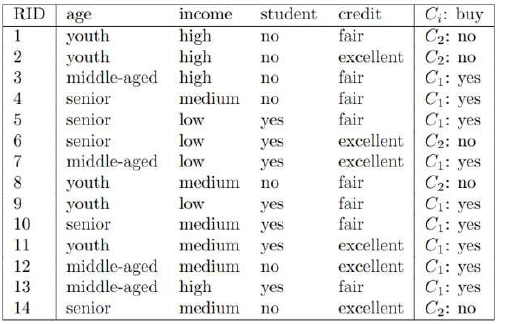.

#### i) Sub-Subtask 5.a - Show the probability of all the components of Bayesian approach.

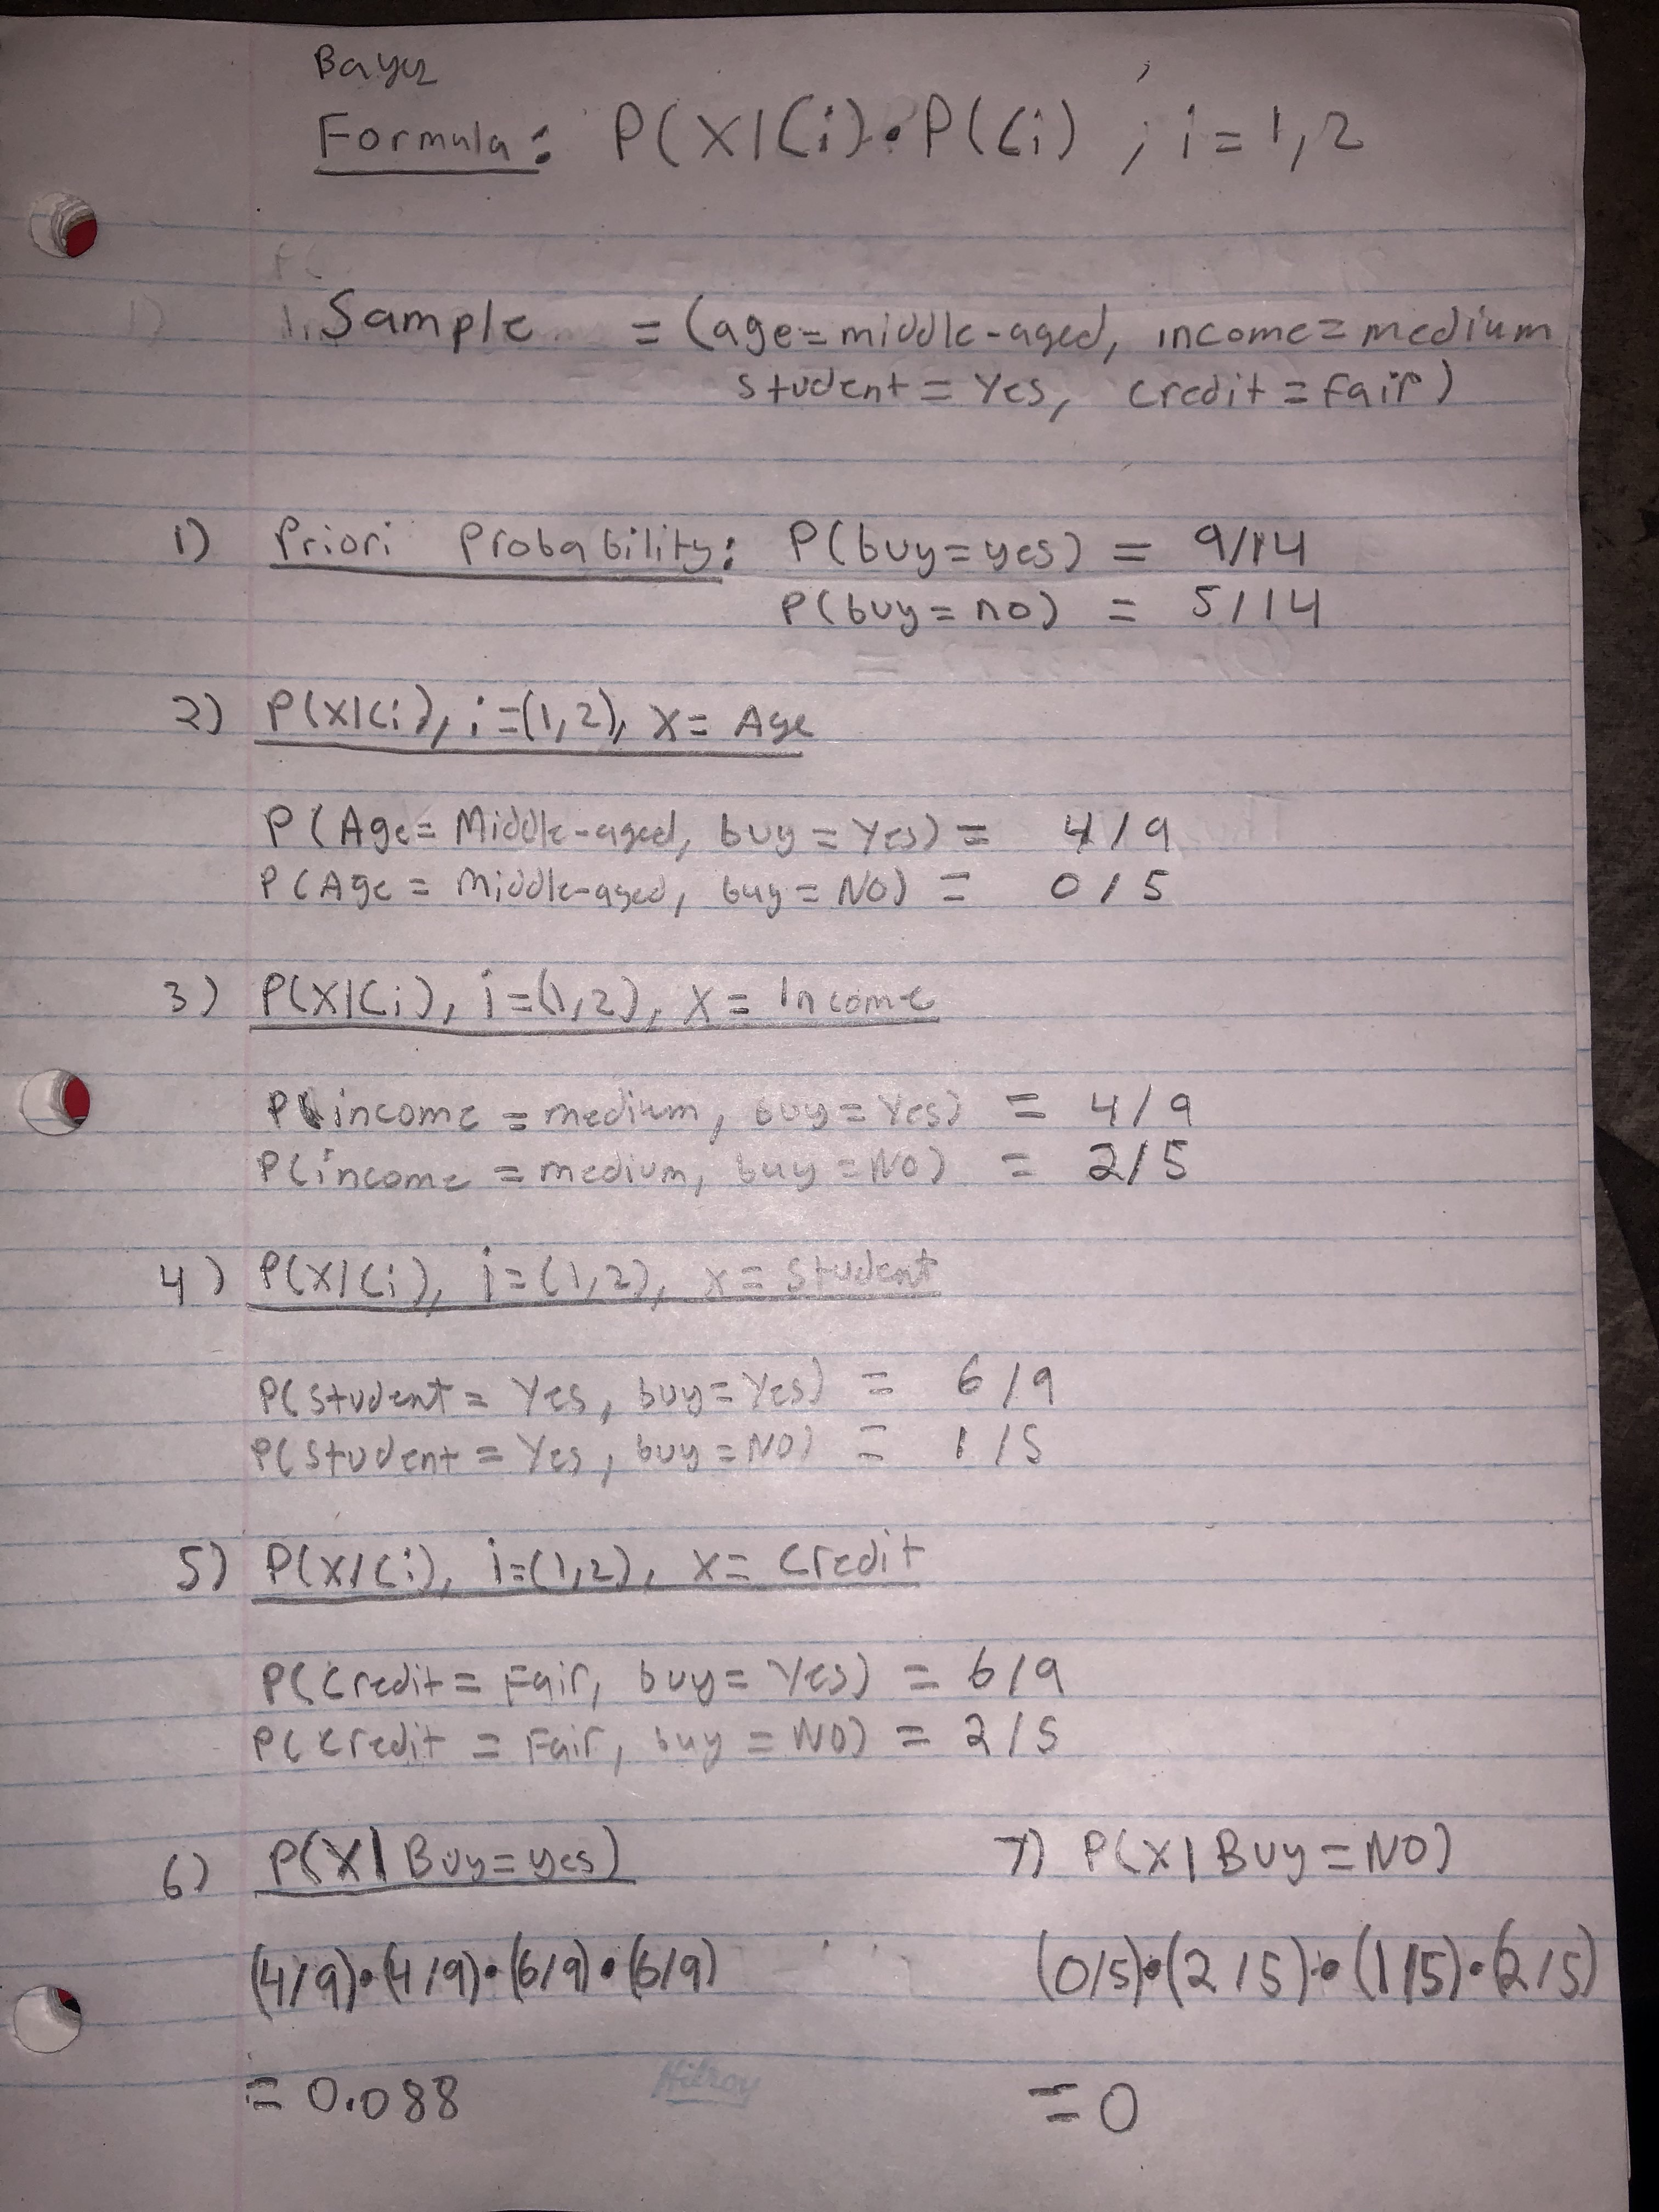

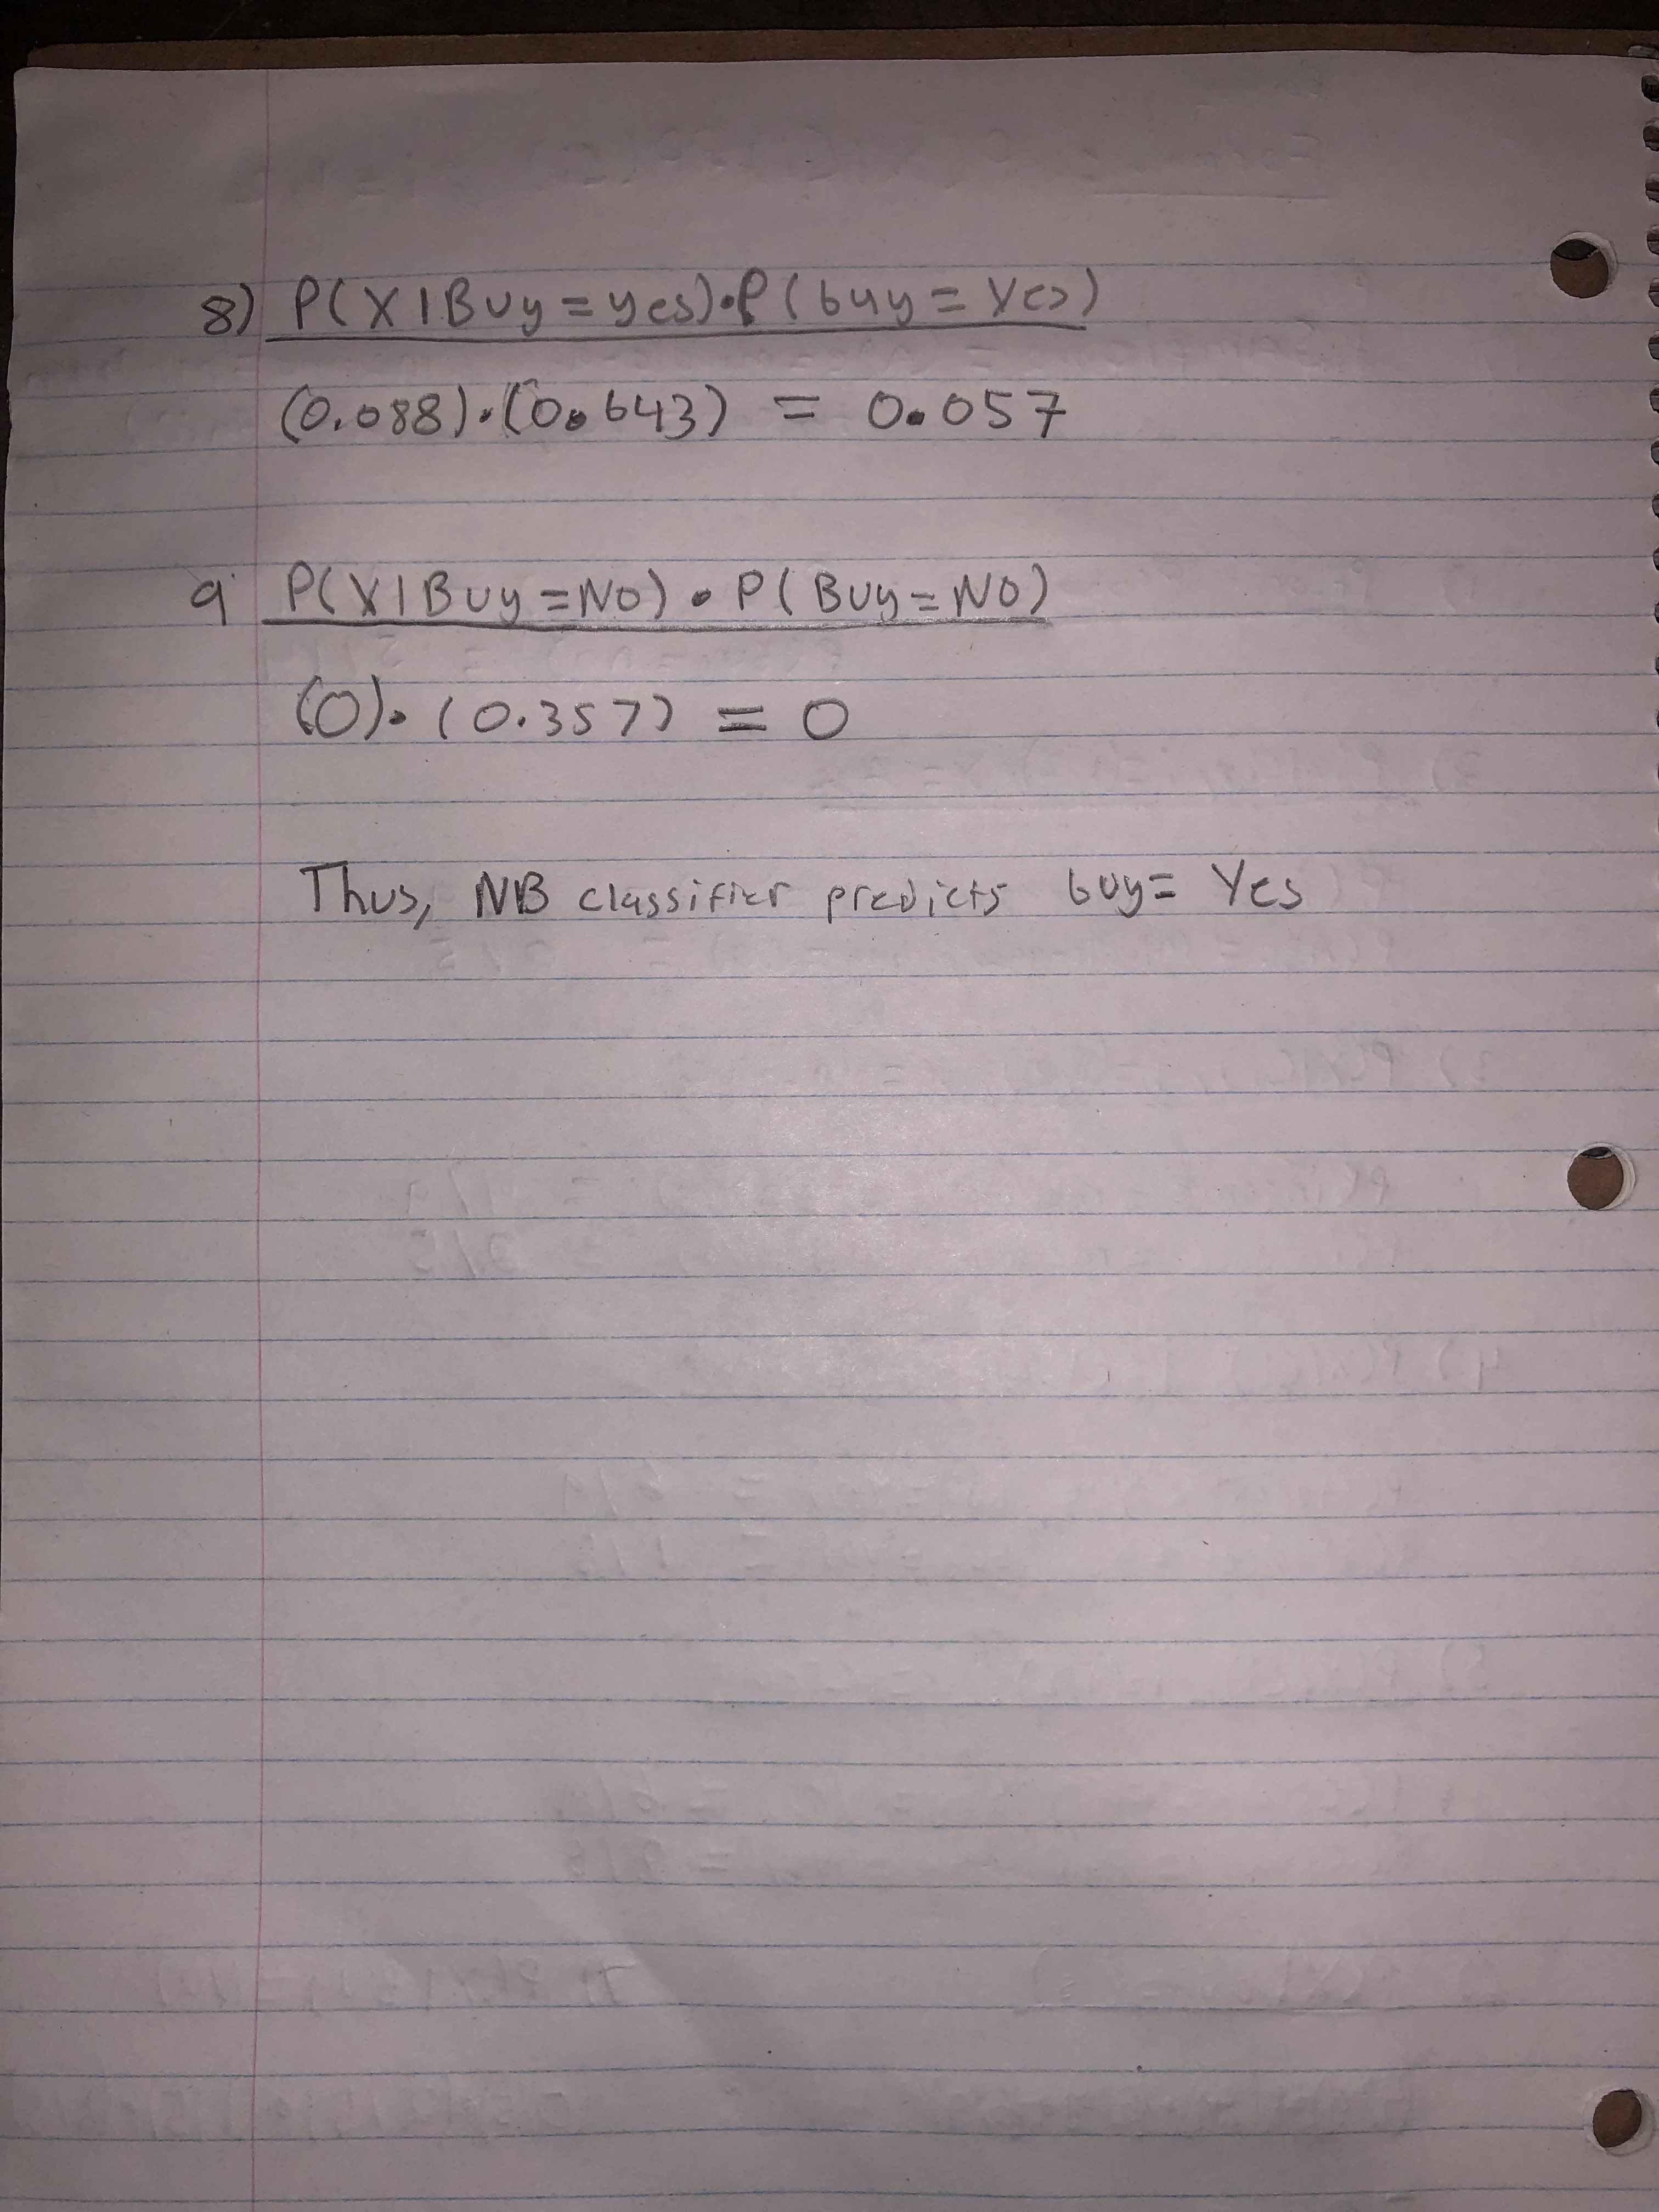

#### ii) Sub-Subtask 5.b - Given the above dataset, what is the prediction of the Naïve Bayes Classifier about Jack & Why?

The prediction of the Naive Bayes Classifier is: Buy = Yes -> Jack is predicted to be able to buy a computer. <br><br>This is because after Maximizing P(X|Ci)*P(Ci) for i = (1,2). <br>The probability that Jack can buy is equal to 0.0057 whereas the probability that Jack can not buy is equal to zero (0). <br> 0.0057 > 0, thus the Naive Bayes approach would predict that he can buy a computer.

### References:

1. Chatgpt (no date) ChatGPT. Available at: https://openai.com/chatgpt (Accessed: 25 October 2023).
2. Stack Overflow. (1965, July 1). Restore default color codes in Seaborn. Available at: https://stackoverflow.com/questions/55861587/restore-default-color-codes-in-seaborn (Accessed: 25 October 2023)
3. Real Python. (2023, June 26). Logistic regression in python. Available at: https://realpython.com/logistic-regression-python/ (Accessed: 25 October 2023)